# Exploring and Analyzing Text Data Assignment 

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
#!pip install wordcloud

<IPython.core.display.Javascript object>

In [3]:
import spacy
import string
import pandas as pd
import seaborn as sns
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


<IPython.core.display.Javascript object>

In [4]:
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens 
             if not token.lower() in stopwords.words('english')
             if not token in string.punctuation]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
              'ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats


<IPython.core.display.Javascript object>

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [5]:
PATH = "cnn_lite_corpus/"
DOC_PATTERN = r".*\.txt"
cnn_corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

<IPython.core.display.Javascript object>

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [6]:
docs_raw = [cnn_corpus.raw(file_id) for file_id in cnn_corpus.fileids()]
docs_df = pd.DataFrame({"doc": docs_raw})
docs = " ".join(docs_raw)

<IPython.core.display.Javascript object>

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [7]:
stats = []
for doc in docs_df["doc"]:
    stats.append(text_stats(doc))
stats_df = pd.DataFrame(stats)

<IPython.core.display.Javascript object>

In [8]:
stats_df.columns = [
    "snets",
    "tokens",
    "words",
    "vocab",
    "num_entities",
    "words_sents",
    "char_word",
    "lex_div",
]

<IPython.core.display.Javascript object>

### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [9]:
stats_df.describe()

,snets,tokens,words,vocab,num_entities,words_sents,char_word,lex_div
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,39.666667,950.333333,507.733333,306.333333,34.933333,12.981498,5.881254,0.636638
std,24.531806,547.891239,300.608304,158.912674,21.773072,1.634671,0.492572,0.070947
min,9.000000,228.000000,119.000000,88.000000,9.000000,11.090909,5.114504,0.492754
25%,21.000000,549.500000,284.000000,182.500000,20.500000,11.875894,5.559381,0.600616
50%,40.000000,1027.000000,535.000000,327.000000,29.000000,12.454545,5.846702,0.624088
75%,50.500000,1244.000000,643.500000,401.000000,39.000000,13.678818,6.216240,0.675362
max,89.000000,2029.000000,1054.000000,579.000000,79.000000,16.173913,6.840741,0.748092


<IPython.core.display.Javascript object>

### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [10]:
doc_1 = docs_raw[1]
cleaned = [
    token.lower()
    for token in word_tokenize(doc_1)
    if not token.lower() in stopwords.words("english")
    if token.isalpha() == True
]

fdist = FreqDist(cleaned)
fdist_df = pd.DataFrame.from_dict(fdist, orient="index").reset_index()
fdist_df.columns = ["Term", "Freq"]
ordered = fdist_df.sort_values("Freq", ascending=False)
filtered = ordered[ordered["Freq"] > 1]

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Term Frequency Distribution \n')

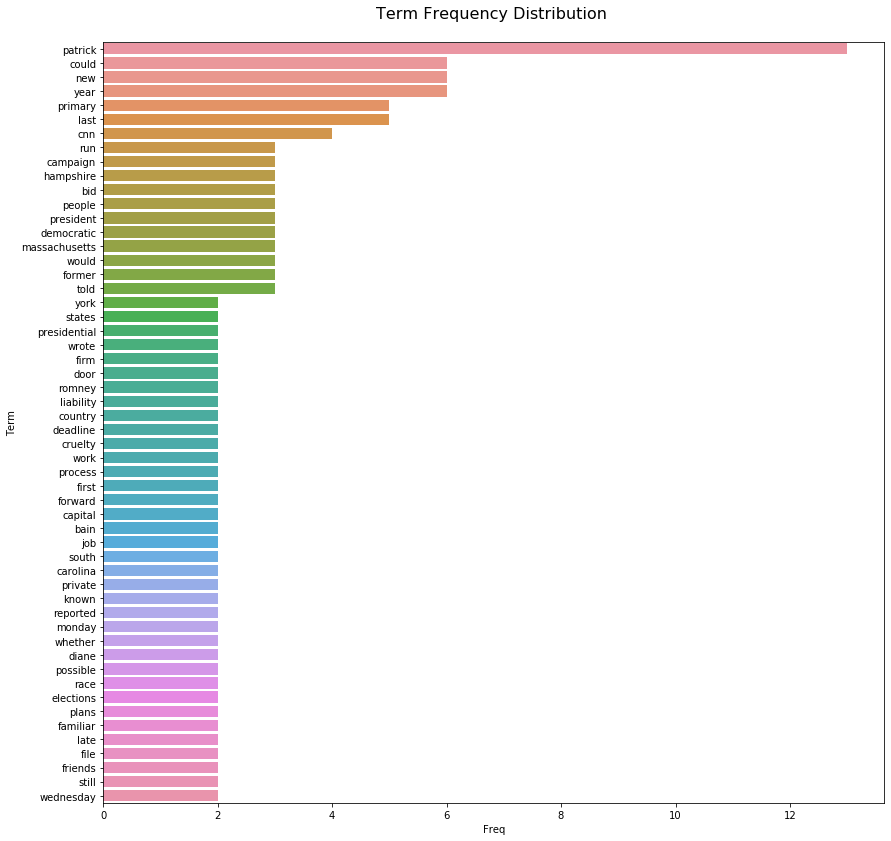

<IPython.core.display.Javascript object>

In [11]:
plt.figure(figsize=(14, 14))
sns.barplot(data=filtered, x="Freq", y="Term")
plt.title("Term Frequency Distribution \n", fontsize=16)

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [12]:
def word_cloud(text, colormap='tab10', background_color='white'):
    cloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS,
                      colormap=colormap, 
                      background_color=background_color).generate(text)
    
    plt.figure(figsize=(12,10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


<IPython.core.display.Javascript object>

In [13]:
filtered.head()

,Term,Freq
5,patrick,13
42,could,6
33,new,6
99,year,6
35,primary,5


<IPython.core.display.Javascript object>

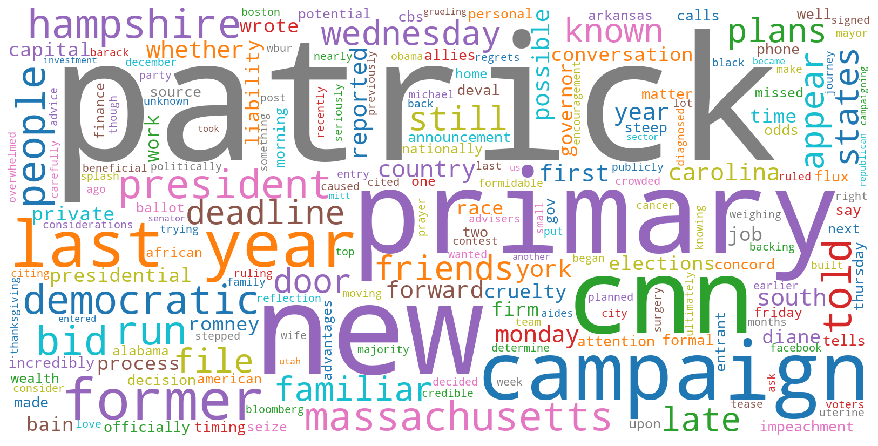

<IPython.core.display.Javascript object>

In [14]:
word_cloud(" ".join(cleaned))

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

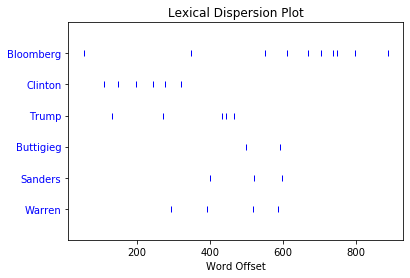

<IPython.core.display.Javascript object>

In [15]:
doc_3 = docs_raw[3]
doc_3_tokenized = word_tokenize(doc_3)
figures = ["Bloomberg", "Clinton", "Trump", "Buttigieg", "Sanders", "Warren"]
Text(doc_3_tokenized).dispersion_plot(figures)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [16]:
# !pip install yellowbrick

<IPython.core.display.Javascript object>

In [17]:
from yellowbrick.text.postag import PosTagVisualizer

<IPython.core.display.Javascript object>

In [21]:
tagged = pos_tag(doc_3_tokenized)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(
    " ".join((visualizer.colorize(toke, color) for color, token in visualizer.tagset)))


ValueError: not enough values to unpack (expected 2, got 1)

<IPython.core.display.Javascript object>

In [ ]:
visualizer.tagset_